# Car price prediction

In [1]:
import pandas as pd

<b>Reading the data from Automobile dataset as a Pandas DataFrame</b>

In [2]:
car_price=pd.read_csv("../data/Automobile/Automobile.csv", index_col=0)
car_price.set_index('index',inplace=True) 
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


<b> Total number of rows and columns in the dataset </b>

In [3]:
car_price.shape

(61, 9)

<b>Here we can get all information about the data set</b>

In [4]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


<b>Display the missing values in the DataFrame</b>

In [5]:
car_price[car_price.isna().any(axis=1)]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


<b> Using 'ffill' or 'forward fill' method we replacing missing values with the previous valid values </b>

In [6]:
car_price.fillna(method="ffill", inplace=True)

<b> Again Display the missing values from dataframe </b>

In [7]:
car_price[car_price.isna().any(axis=1)]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,


<b>Select which columns has categorical values</b>

In [8]:
car_price.select_dtypes(['object']).head()

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five


<b> We put it into a another object </b>

In [9]:
category_cols =car_price.select_dtypes(["object"]).head()
category_cols

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five


In [10]:

for col in category_cols:
    print(car_price[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [11]:
from sklearn.preprocessing import LabelEncoder

<b>Change categorical data into a numerical data</b> 

In [12]:
lbl_encoder=LabelEncoder()

car_price['company']=lbl_encoder.fit_transform(car_price['company'])
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,0,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,0,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,1,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,1,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [13]:
lbl_encoder=LabelEncoder()
car_price['body-style']=lbl_encoder.fit_transform(car_price['body-style'])
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,dohc,four,111,21,13495.0
1,0,0,88.6,168.8,dohc,four,111,21,16500.0
2,0,2,94.5,171.2,ohcv,six,154,19,16500.0
3,1,3,99.8,176.6,ohc,four,102,24,13950.0
4,1,3,99.4,176.6,ohc,five,115,18,17450.0


In [14]:
lbl_encoder=LabelEncoder()
car_price['engine-type']=lbl_encoder.fit_transform(car_price['engine-type'])
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,5,six,154,19,16500.0
3,1,3,99.8,176.6,3,four,102,24,13950.0
4,1,3,99.4,176.6,3,five,115,18,17450.0


In [15]:
car_price=car_price.replace({"num-of-cylinders":{"two":2, 
                                                   "three":3, 
                                                   "four":4, 
                                                   "five":5, 
                                                   "six":6, 
                                                   "eight":8, 
                                                   "twelve":12}})
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,5,6,154,19,16500.0
3,1,3,99.8,176.6,3,4,102,24,13950.0
4,1,3,99.4,176.6,3,5,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,14,3,97.3,171.7,3,4,85,27,7975.0
82,14,3,97.3,171.7,3,4,52,37,7995.0
86,14,3,97.3,171.7,3,4,100,26,9995.0


<b> Check correlation between price with others</b>

In [16]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(7,5))
car_price.corr().style.background_gradient(cmap="coolwarm")

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.171622,-0.005248,-0.027407,0.109381,-0.052472,-0.104871,0.193498,-0.157061
body-style,0.171622,1.000000,0.420375,0.296047,0.046794,-0.039032,-0.168441,0.050702,-0.137076
wheel-base,-0.005248,0.420375,1.000000,0.878381,0.025034,0.499083,0.463421,-0.547325,0.647353
length,-0.027407,0.296047,0.878381,1.000000,0.007572,0.614195,0.668555,-0.788429,0.773591
engine-type,0.109381,0.046794,0.025034,0.007572,1.000000,0.145542,0.026437,-0.059321,0.047293
num-of-cylinders,-0.052472,-0.039032,0.499083,0.614195,0.145542,1.000000,0.852514,-0.622661,0.782531
horsepower,-0.104871,-0.168441,0.463421,0.668555,0.026437,0.852514,1.000000,-0.808804,0.894636
average-mileage,0.193498,0.050702,-0.547325,-0.788429,-0.059321,-0.622661,-0.808804,1.000000,-0.774841
price,-0.157061,-0.137076,0.647353,0.773591,0.047293,0.782531,0.894636,-0.774841,1.000000


In [17]:
car_price.describe()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,7.721311,2.688525,98.481967,173.098361,2.950820,4.721311,107.852459,25.803279,15459.737705
std,4.615666,0.940585,6.679234,14.021846,1.160836,1.495896,53.524398,8.129821,11489.452464
min,0.000000,0.000000,88.400000,141.100000,0.000000,2.000000,48.000000,13.000000,5151.000000
25%,3.000000,2.000000,94.500000,159.100000,3.000000,4.000000,68.000000,19.000000,6785.000000
50%,8.000000,3.000000,96.300000,171.200000,3.000000,4.000000,100.000000,25.000000,10345.000000
75%,12.000000,3.000000,101.200000,177.300000,3.000000,5.000000,123.000000,31.000000,18344.000000
max,15.000000,4.000000,120.900000,208.100000,6.000000,12.000000,288.000000,47.000000,45400.000000


In [18]:
import seaborn as sns
import matplotlib as mpl

<b>Ploting using for data visualization</b>

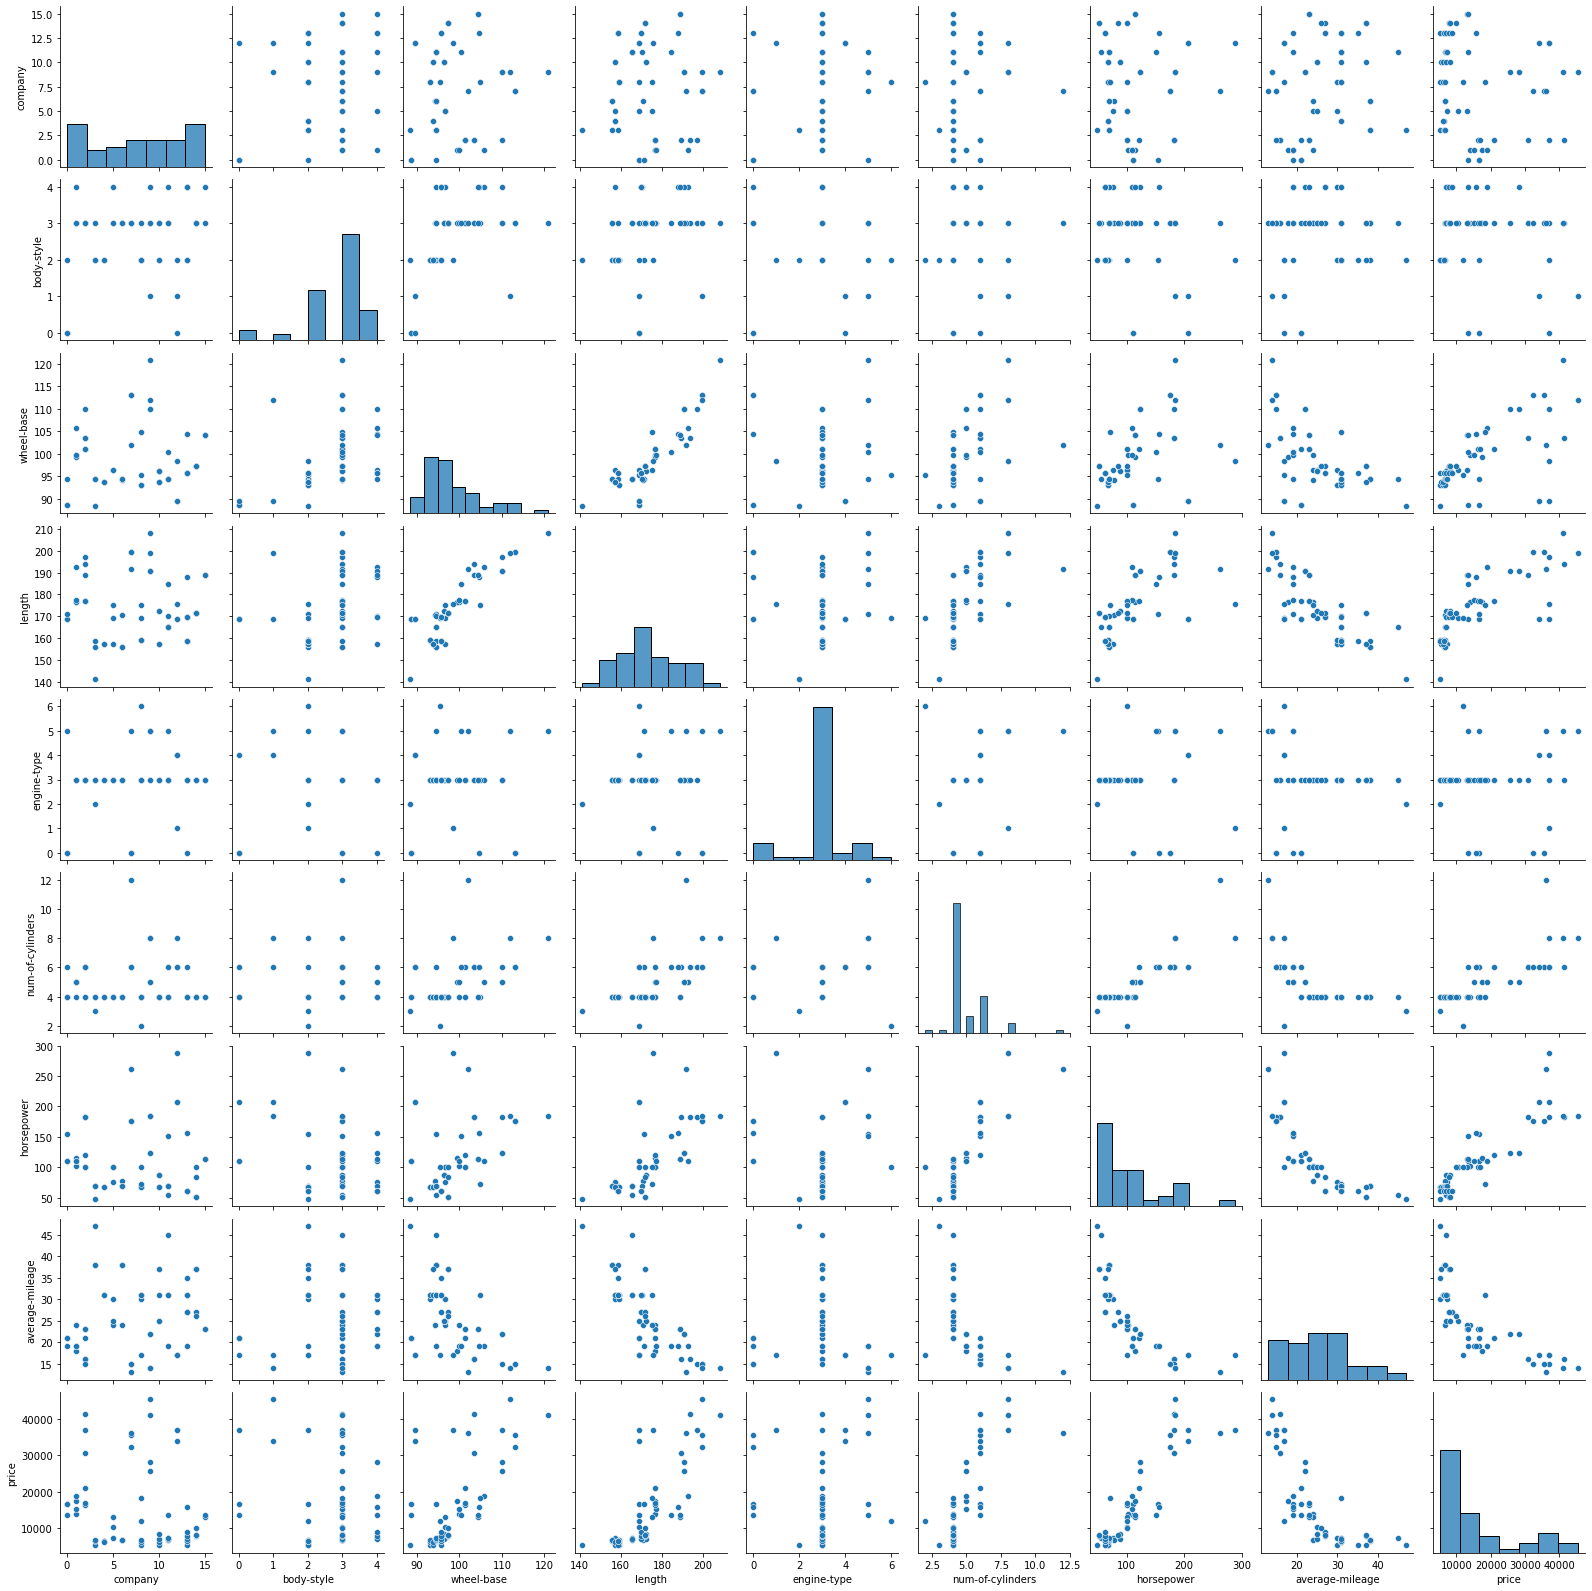

In [19]:
sns.pairplot(car_price)

<b>Put some attractive colour background</b>

<Figure size 288x288 with 0 Axes>

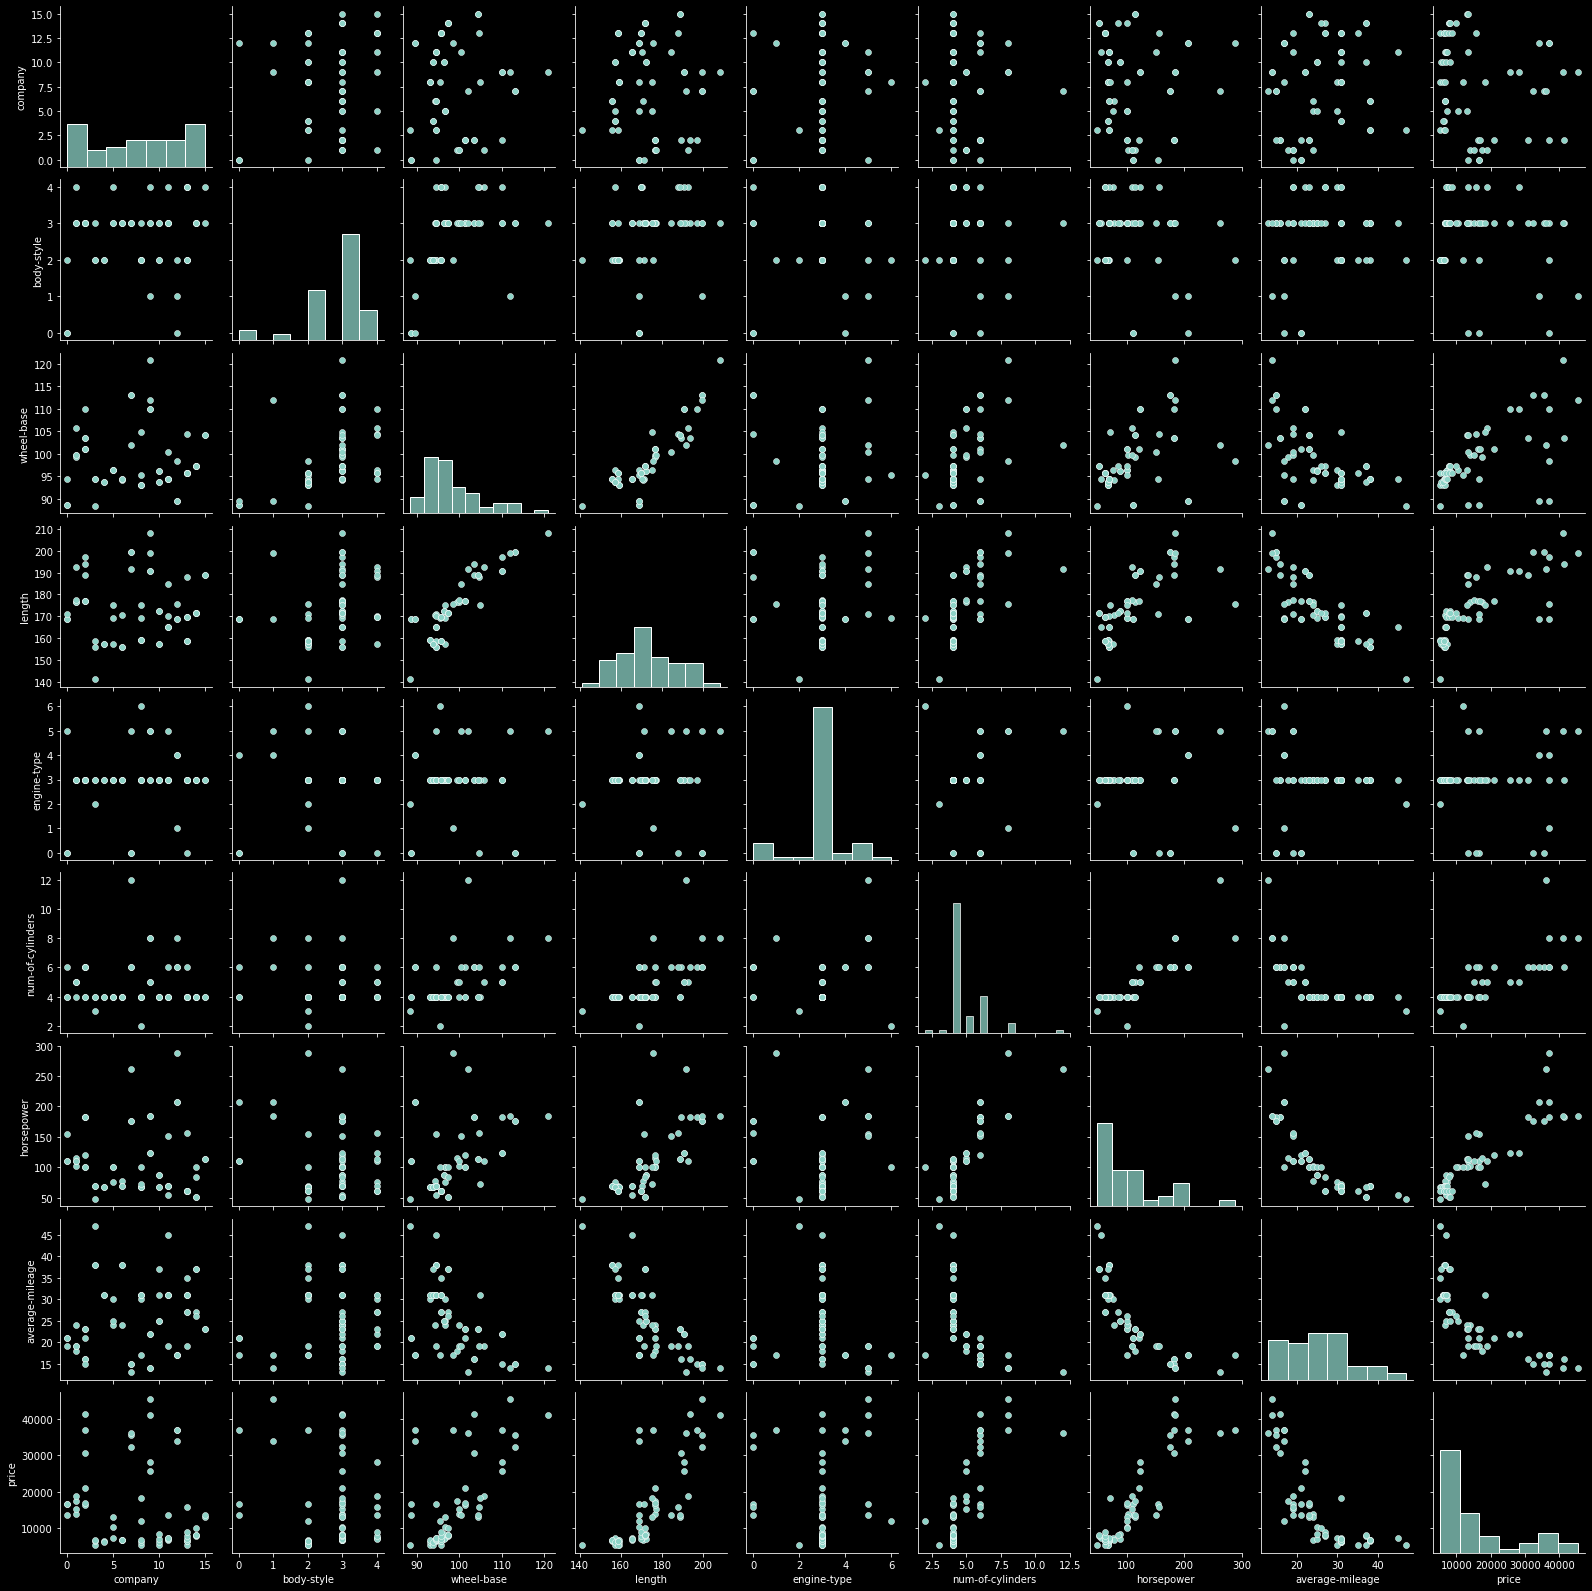

In [20]:
plt.style.use("dark_background")

plt.figure(figsize=(4, 4))
sns.pairplot(car_price)

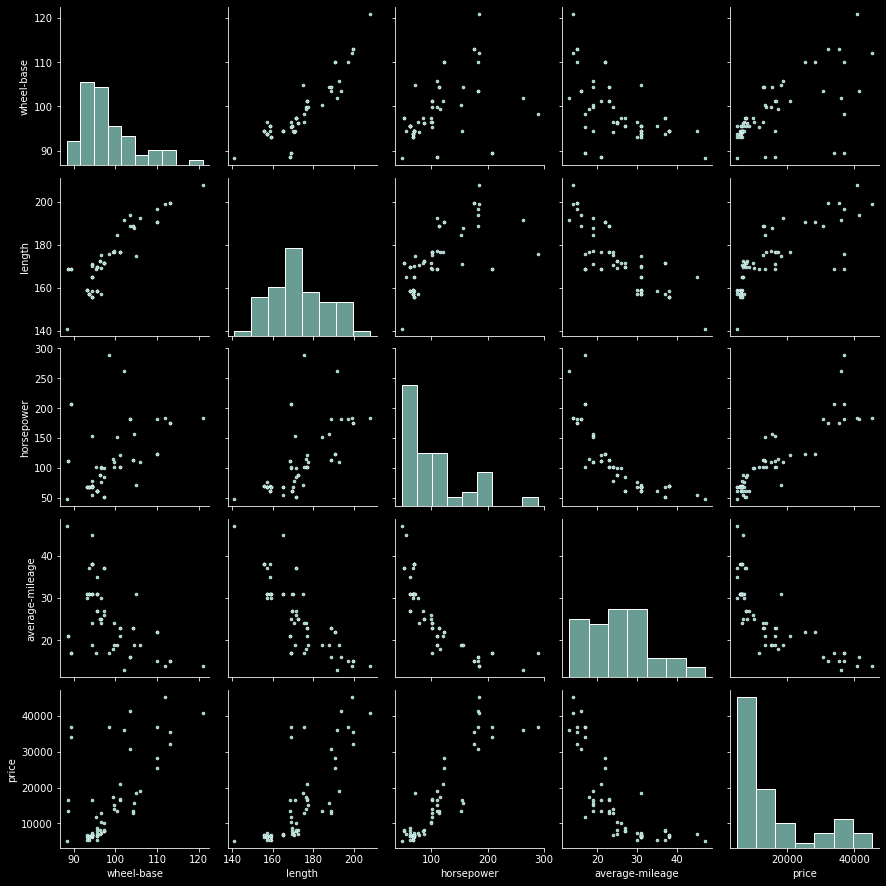

In [21]:
sns.pairplot(car_price[['wheel-base', 'length', 'horsepower', 'average-mileage', 'price']], 
             markers=".")
plt.show()

In [22]:
plt.subplot?


Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

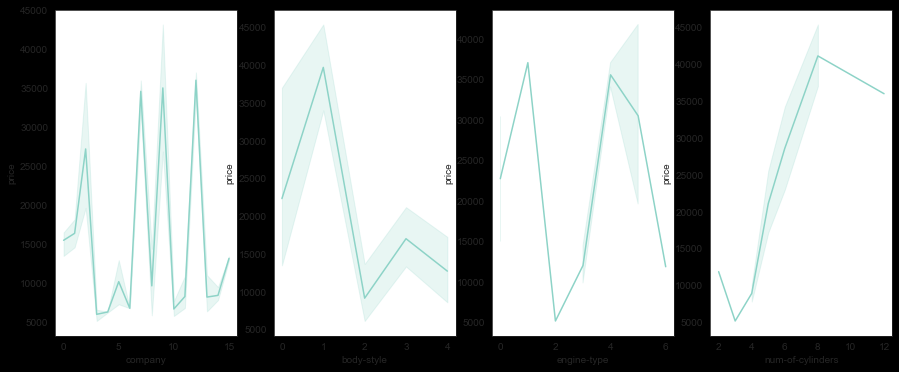

In [23]:
plt.figure(figsize=(15, 6))
sns.set_style("white")
plt.subplot(141)
sns.lineplot(data=car_price, x="company", y="price")

plt.subplot(142)
sns.lineplot(data=car_price, x="body-style", y="price")

plt.subplot(143)
sns.lineplot(data=car_price, x="engine-type", y="price")

plt.subplot(144)
sns.lineplot(data=car_price, x="num-of-cylinders", y="price")
plt.show()

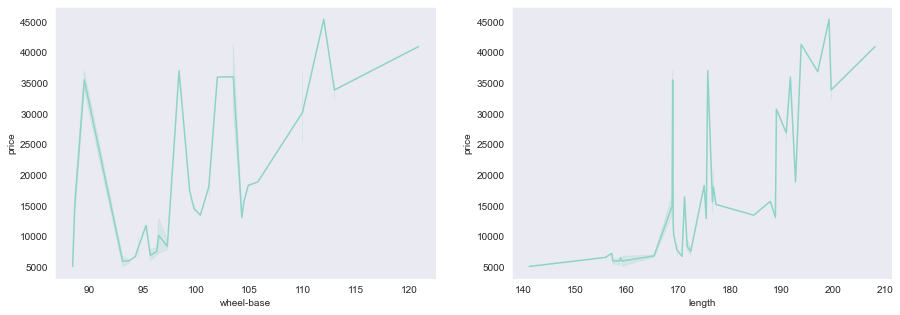

In [24]:
plt.figure(figsize=(15, 5))
sns.set_style("dark")

plt.subplot(121)
sns.lineplot(data=car_price, x="wheel-base", y="price")

plt.subplot(122)
sns.lineplot(data=car_price, x="length", y="price")


plt.show()

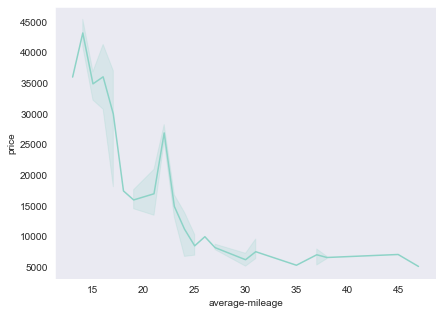

In [25]:
plt.figure(figsize=(15, 5))
sns.set_style("dark")

plt.subplot(121)
sns.lineplot(data=car_price, x="average-mileage", y="price")

plt.show()

<AxesSubplot:xlabel='horsepower', ylabel='price'>

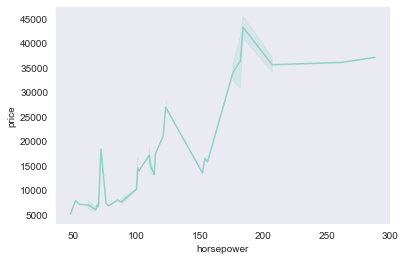

In [26]:
sns.lineplot(data=car_price, x="horsepower", y="price")

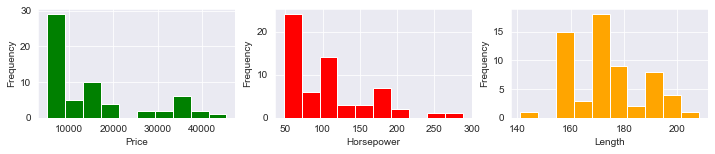

In [27]:
plt.figure(figsize=(12, 2))
sns.set_style('darkgrid')

kwargs = {"kind": "hist", 
          "bins": 10}

plt.subplot(131)
car_price.price.plot(**kwargs, color="g")
# plt.xticks(rotation="vertical")
plt.xlabel("Price")

plt.subplot(132)
car_price.horsepower.plot(**kwargs, color="r")
# plt.xticks(ticks=True)
plt.xlabel("Horsepower")

plt.subplot(133)
car_price.length.plot(**kwargs, color="orange")
# plt.xticks(ticks=True)
plt.xlabel("Length")

plt.show()

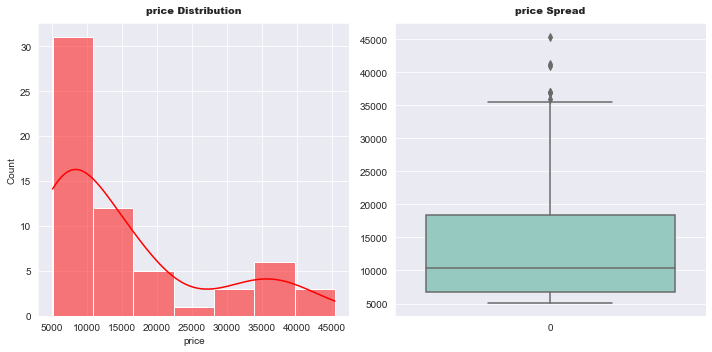

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(car_price["price"],color="red",kde=True)
plt.title("price Distribution",fontweight="black",pad=10,fontsize=10)
plt.subplot(1,2,2)
sns.boxplot(car_price["price"])
plt.title("price Spread",fontweight="black",pad=10,fontsize=10)

plt.tight_layout()
plt.show()

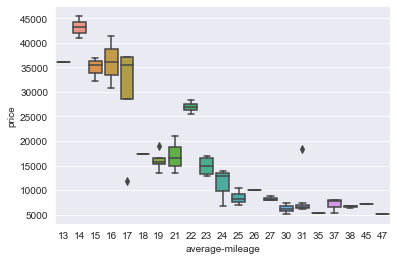

In [29]:
sns.boxplot(data=car_price, x="average-mileage", y="price")
plt.show()

In [30]:
car_price.price.skew()

1.1984787118554663

<b>Select our target and features</b>

In [31]:
x = car_price.drop(['company', 'body-style', 'engine-type', 'num-of-cylinders', 'price'], axis=1)
y = car_price.price

In [32]:
x

,wheel-base,length,horsepower,average-mileage
index,,,,
0,88.6,168.8,111,21
1,88.6,168.8,111,21
2,94.5,171.2,154,19
3,99.8,176.6,102,24
4,99.4,176.6,115,18
...,...,...,...,...
81,97.3,171.7,85,27
82,97.3,171.7,52,37
86,97.3,171.7,100,26


In [33]:
y

index
0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
       ...   
81     7975.0
82     7995.0
86     9995.0
87    12940.0
88    13415.0
Name: price, Length: 61, dtype: float64

<b>Now we split the data training & testing</b>

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, 
                                                   random_state=0)

In [35]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (48, 4)
x_test shape: (13, 4)
y_train shape: (48,)
y_test shape: (13,)


In [36]:
x_train

,wheel-base,length,horsepower,average-mileage
index,,,,
54,94.5,165.3,69,31
45,110.0,190.9,123,22
56,94.5,170.2,69,31
67,95.7,158.7,62,31
9,101.2,176.8,101,23
17,94.5,155.9,70,38
44,110.0,190.9,123,22
69,95.7,169.7,62,31
38,93.1,159.1,68,31


In [37]:
x_test

,wheel-base,length,horsepower,average-mileage
index,,,,
35,102.0,191.7,262,13
47,112.0,199.2,184,14
88,104.3,188.8,114,23
37,93.1,159.1,68,31
14,103.5,193.8,182,16
2,94.5,171.2,154,19
46,120.9,208.1,184,14
87,104.3,188.8,114,23
53,94.5,165.3,55,45


In [38]:
y_train

index
54     6649.0
45    28248.0
56     7349.0
67     6338.0
9     16430.0
17     6295.0
44    25552.0
69     6918.0
38     6795.0
55     6849.0
80     7775.0
27     7295.0
82     7995.0
36     5195.0
18     6575.0
5     15250.0
43    18344.0
19     6377.0
70     7898.0
29    10345.0
86     9995.0
10    16925.0
16     5151.0
34    35550.0
50     6189.0
20     6229.0
61    34028.0
66     5348.0
79    15750.0
51     6989.0
1     16500.0
15    36880.0
62    37028.0
33    32250.0
6     18920.0
32     6785.0
49     5389.0
68     6488.0
30     6785.0
28    12945.0
11    20970.0
52     8189.0
81     7975.0
3     13950.0
0     13495.0
71     8778.0
63    37028.0
57    13499.0
Name: price, dtype: float64

In [39]:
y_test

index
35    36000.0
47    45400.0
88    13415.0
37     6095.0
14    41315.0
2     16500.0
46    40960.0
87    12940.0
53     7099.0
31     6785.0
4     17450.0
13    30760.0
39    11845.0
Name: price, dtype: float64

<b>Importing and fitting the model on training data</b>

In [40]:
from sklearn.linear_model import LinearRegression

car_model = LinearRegression()
car_model.fit(x_train, y_train)

LinearRegression()

<b>Checking the slope, m and the intercept, c</b>

In [41]:
m = car_model.coef_
c = car_model.intercept_

m,c

(array([304.18215131,  82.86123881, 160.66583917,  49.52218689]),
 -47550.672647432046)

In [42]:
y_pred_train = car_model.predict(x_train)
y_pred_train

array([ 7512.63412394, 22578.9608162 ,  7918.65419412,  6206.10765514,
       15248.68814248,  7241.05962651, 22578.9608162 ,  7117.58128208,
        6412.37359229,  7512.63412394,  6460.46993143,  8516.67495562,
        6460.46993143,  6362.8514054 ,  7481.35721907, 16112.16755504,
       11961.8800316 ,  6445.73265322,  6919.49253452, 13119.37902706,
       13627.68615591, 15248.68814248,  1070.2533893 , 32381.03421573,
        6445.73265322,  6445.73265322, 27768.59901645,  6404.19640271,
       25802.49527568, 11403.9946148 , 12260.71714337, 32217.04357591,
       27768.59901645, 32381.03421573, 19213.32354063,  7241.05962651,
        6742.86577456,  6206.10765514,  8998.58562758, 13752.54848386,
       18362.96055215, 11403.9946148 , 11267.22075521, 15016.44890894,
       12260.71714337,  6919.49253452, 44053.20956006, 23647.52913441])

In [43]:
y_pred_test = car_model.predict(x_test)
y_pred_test

array([42098.64455973, 33279.51209538, 19274.64358654,  6412.37359229,
       30024.22581506, 21063.84551992, 36724.1982675 , 19274.64358654,
        5956.622992  ,  7241.05962651, 16686.29883631, 29626.49186876,
       12510.56266564])

<b> Mean squared error</b>

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

32979992.63117067

<b>Accuracy </b>

In [45]:
accuracy = r2_score(y_test, y_pred_test)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 83.31226270770995


<b> r2 score</b>

In [46]:
r2score_train= r2_score(y_train, y_pred_train)
r2score_train

0.8649045690188502

In [47]:
r2score_test= r2_score(y_test, y_pred_test)
r2score_test

0.8331226270770995

In [48]:
# Visualize the actual price and predicted price

car_df = pd.DataFrame({"Actual": y_test,
                       "Predicted": y_pred_test,
                       "Error": abs(y_test-y_pred_test)})

car_df.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
index,,,
35,36000.000000,42098.644560,6098.644560
47,45400.000000,33279.512095,12120.487905
88,13415.000000,19274.643587,5859.643587
37,6095.000000,6412.373592,317.373592
14,41315.000000,30024.225815,11290.774185


In [49]:
car_df.Error.describe()

count       13.000000
mean      4229.417174
std       4043.475186
min        317.373592
25%        763.701164
50%       4235.801733
75%       6098.644560
max      12120.487905
Name: Error, dtype: float64

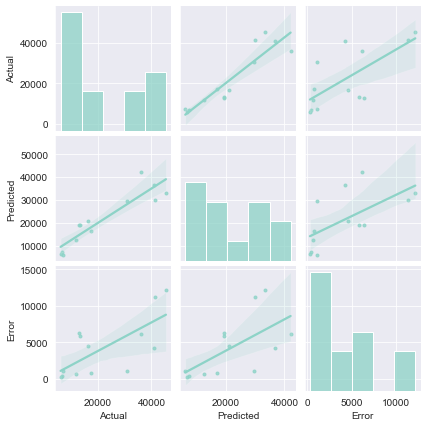

In [50]:
sns.pairplot(car_df.iloc[0:], kind="reg", height=2, markers=".")

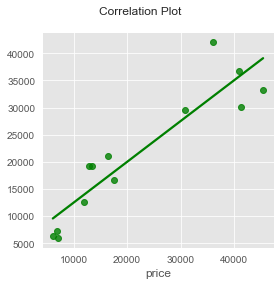

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
sns.regplot(x=y_test, 
            y=y_pred_test, 
            ci=None, 
            color="g")

plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

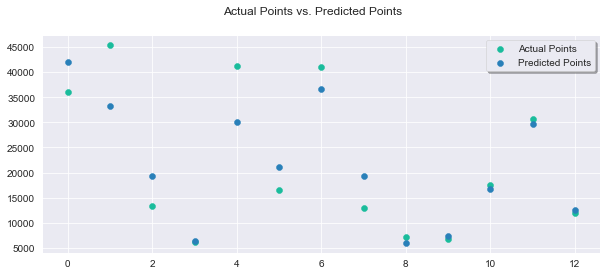

In [52]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')

plt.scatter(x=range(13),
           y=y_test.head(13),
           color="#1abc9c",
           label="Actual Points")
plt.scatter(x=range(13),
           y=y_pred_test[:13],
           color="#2980b9",
           label="Predicted Points")

plt.suptitle("Actual Points vs. Predicted Points")
plt.legend(shadow=True,
           loc="best")
plt.show()

In [53]:
x_test.tail()

,wheel-base,length,horsepower,average-mileage
index,,,,
53,94.5,165.3,55,45
31,94.5,155.9,70,38
4,99.4,176.6,115,18
13,103.5,189.0,182,16
39,95.3,169.0,101,17


<b>Now we predict on the new data</b>


In [54]:
features = pd.DataFrame({'wheel-base':[100, 103.5], 
 'length':[177, 189.0], 
 'horsepower':[117, 182], 
 'average-mileage':[20, 16]}, index=[0, 1])

features

,wheel-base,length,horsepower,average-mileage
0,100.0,177.0,117,20
1,103.5,189.0,182,16


In [55]:
car_model.predict(features)

array([17322.32867475, 29626.49186876])